In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import sys
sys.path.append('/mnt/c/Users/cleon/Documents/CAL_CAL/ironhack/Proyectos/W7-Kaggle_competition/src')
import analysis as a

In [2]:
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

In [35]:
train = pd.read_csv('../data/train_clean.csv')

In [36]:
train.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
24715,24715,0.90,3,1,3,61.8,59.0,3398
21871,21871,0.30,3,6,3,61.1,59.0,911
14407,14407,0.73,3,6,4,60.0,58.0,3620
34182,34182,0.34,4,4,3,62.9,55.0,880
9498,9498,0.32,4,6,5,62.1,54.0,858


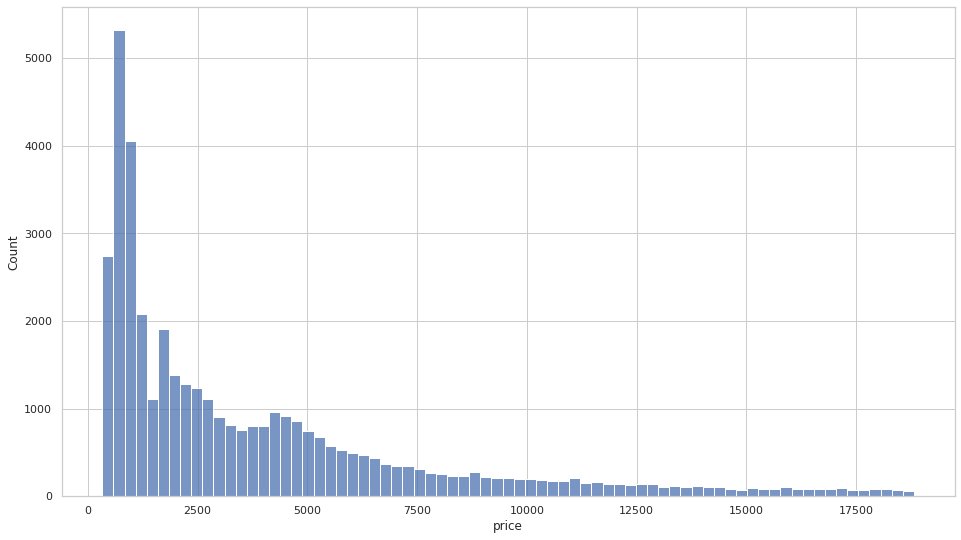

In [6]:
sns.histplot(train.price);

In [7]:
X = train.drop(columns='price')

In [8]:
y = train.price

In [9]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [10]:
models={
    'ridge': Ridge(),
    'lasso': Lasso(),
    'sgd': SGDRegressor(),
    'knn': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
}

In [11]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  ridge
ENTRENANDO:  lasso
ENTRENANDO:  sgd
ENTRENANDO:  knn
ENTRENANDO:  grad


In [12]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"------{name}------")
    print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2 - ', metrics.r2_score(y_test, y_pred))

------ridge------
MAE -  862.7929862787508
MSE -  1527681.10879301
RMSE -  1235.9939760342727
R2 -  0.9058821889663285
------lasso------
MAE -  862.4289372480364
MSE -  1527776.2688585836
RMSE -  1236.032470794592
R2 -  0.9058763263180193
------sgd------
MAE -  5.69162488986793e+16
MSE -  4.2969763869283633e+33
RMSE -  6.55513263552185e+16
R2 -  -2.6472933996061357e+26
------knn------
MAE -  3211.7244345569147
MSE -  18571230.946730934
RMSE -  4309.435107613402
R2 -  -0.1441416633658974
------grad------
MAE -  344.54979859664206
MSE -  408466.1237003642
RMSE -  639.113545233055
R2 -  0.9748351032013082


In [13]:
results = []
for depth in range(1,21):
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train,y_train)
    
    result = {
        "model": model,
        "depth": depth,
        "train_error": mean_squared_error(y_train, model.predict(X_train)),
        "test_error": mean_squared_error(y_test, model.predict(X_test))
    }
    results.append(result)

In [14]:
tree = pd.DataFrame(results)

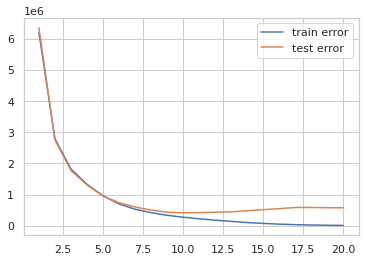

In [15]:
plt.plot(tree.depth, tree.train_error, label="train error")
plt.plot(tree.depth, tree.test_error, label="test error")
plt.legend();

Sigue siendo un error muy grande. Rechazamos este modelo.

Vamos a probar un RandomForestRegressor con varios parámetros y aplicarle un GridSearchCV para que me encuentre los mejores parámetros y probaremos con el modelo resultante.

In [16]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 400]}

In [17]:
rfr = RandomForestRegressor()

In [18]:
grid = GridSearchCV(rfr, parameters, verbose=1)

In [19]:
# grid.fit(X_train,y_train)

In [20]:
# print(grid.best_params_)


Too slow. We are going to perform a PCA analysis to reduce the number of predictors.

## PCA Analysis 

First of all, we need to standardize the data, because PCA is effected by scale so you need to scale the features in the data before applying PCA.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [22]:
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [23]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [24]:
X_train[0]

array([-2.23367667, -0.94643995, -0.08558131, -0.37683379,  0.53106269,
       -0.07254669, -0.06262409])

In [25]:
# grid.fit(X_train,y_train)

In [26]:
# print(grid.best_params_)

In [27]:
# rfr_params = RandomForestRegressor(bootstrap=True, max_depth= 20, max_features= 'auto', min_samples_leaf=2, min_samples_split= 2, n_estimators= 400)

In [28]:
# pickle.dump(rfr_params, open("mi_mejor_modelo", 'wb'))

In [29]:
loaded_tree = pickle.load(open("mi_mejor_modelo", 'rb'))

In [30]:
loaded_tree.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, n_estimators=400)

In [31]:
y_pred_mejor = rfr_params.predict(X_test)

NameError: name 'rfr_params' is not defined

In [32]:
print(f"------RFR------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred_mejor))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred_mejor))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mejor)))
print('R2 - ', metrics.r2_score(y_test, y_pred_mejor))

------RFR------


NameError: name 'y_pred_mejor' is not defined

In [33]:
grad2 = GradientBoostingRegressor() 

In [34]:
grad2.fit(X_test,y_test)

GradientBoostingRegressor()

In [35]:
y_pred = grad2.predict(X_test)
print(f"------GRAD------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - ', metrics.r2_score(y_test, y_pred))

------GRAD------
MAE -  491.6685798322572
MSE -  574495.5377567867
RMSE -  757.954838863627
R2 -  0.9646063159706147


WE haven´t improved our RMSE score using PCA with RandomForest and GradientBoosting. We will next select the best predictors to simplify our model

## Predictors selection

In [89]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [90]:
X_train

,Unnamed: 0,carat,cut,color,clarity,depth,table
10220,10220,0.84,2,5,2,58.8,58.0
15747,15747,0.52,4,3,3,61.7,56.0
9228,9228,1.19,4,3,6,61.6,59.0
13867,13867,1.47,2,0,5,62.6,60.0
9659,9659,0.70,2,4,2,61.3,59.0
...,...,...,...,...,...,...,...
9804,9804,2.04,3,2,2,60.6,61.0
16216,16216,1.14,4,0,2,60.2,57.0
16222,16222,0.23,2,5,6,60.2,59.0
32870,32870,1.19,3,3,1,58.9,60.0


In [91]:
X_train.drop(columns=['Unnamed: 0', 'depth'],inplace=True)
X_test.drop(columns=['Unnamed: 0', 'depth'],inplace=True)

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [93]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_test, y_test)
selector.support_

array([ True,  True,  True,  True,  True])

In [94]:
selector.ranking_

array([1, 1, 1, 1, 1])

In [95]:
X_test

array([[-0.54890273,  0.97771011,  0.94438521, -0.63598656, -0.64647057],
       [-0.21213778, -0.80502236,  0.3567048 , -0.03150889,  0.69416581],
       [ 0.48243993, -2.58775483, -1.40633644,  0.57296878,  0.24728702],
       ...,
       [-0.19108997, -0.80502236,  0.3567048 ,  1.17744645,  0.24728702],
       [-0.82252425,  0.08634387,  0.3567048 ,  1.78192412,  0.24728702],
       [ 0.44034431,  0.08634387, -0.23097562, -0.03150889,  1.1410446 ]])

In [96]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_test, y_test)
selector.support_

array([ True,  True,  True,  True,  True])

In [97]:
selector.ranking_

array([1, 1, 1, 1, 1])

In [98]:
grad2.fit(X_train, y_train)
y_pred = grad2.predict(X_test)
print(f"------GRAD------")
print('MAE - ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE - ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - ', metrics.r2_score(y_test, y_pred))

------GRAD------
MAE -  333.06667917319265
MSE -  366314.84748837294
RMSE -  605.2394959752486
R2 -  0.9764059363662941


This is the best result we have obtained. Now we are going to test the GradientBoostingRegressor parameters to find the most suitable

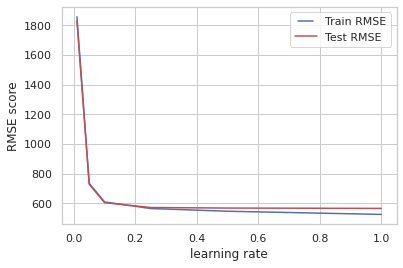

In [99]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(RMSE)
    y_pred = model.predict(X_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(RMSE)

line1, = plt.plot(learning_rates, train_results, 'b', label='Train RMSE')
line2, = plt.plot(learning_rates, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('learning rate')
plt.show()

For this model a learning rate of 0.25 will be ideal

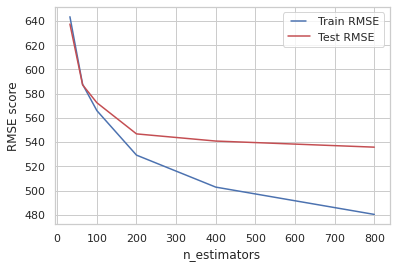

In [100]:
n_estimators = [ 32, 64, 100, 200,400,800]
train_results = []
test_results = []
for eta in n_estimators:
    model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(RMSE)
    y_pred = model.predict(X_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(RMSE)

line1, = plt.plot(n_estimators, train_results, 'b', label='Train RMSE')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('n_estimators')
plt.show()

For this model we will chose a n_estimators= 400

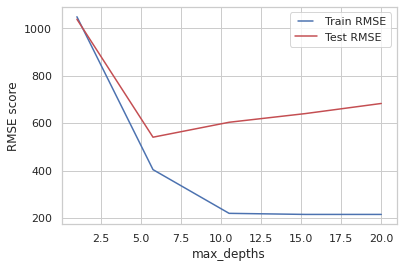

In [101]:
max_depths = np.linspace(1, 20, 5, endpoint=True)
train_results = []
test_results = []
for eta in max_depths:
    model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=400, max_depth=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(RMSE)
    y_pred = model.predict(X_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(RMSE)

line1, = plt.plot(max_depths, train_results, 'b', label='Train RMSE')
line2, = plt.plot(max_depths, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('max_depths')
plt.show()

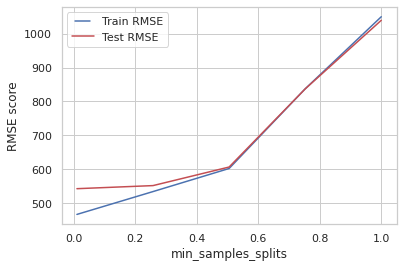

In [102]:
min_samples_splits = np.linspace(0.01, 1, 5, endpoint=True)
train_results = []
test_results = []
for eta in min_samples_splits:
    model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=400, max_depth=6, min_samples_split = eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(RMSE)
    y_pred = model.predict(X_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(RMSE)

line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('min_samples_splits')
plt.show()

Increasing this parameter will not improve our model, so min_samples_splits=0.01

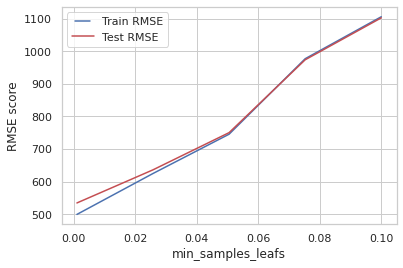

In [110]:
min_samples_leafs = np.linspace(0.001, 0.1, 5, endpoint=True)
train_results = []
test_results = []
for eta in min_samples_leafs:
    model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=400, max_depth=6, min_samples_split=0.01,min_samples_leaf=eta)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
    train_results.append(RMSE)
    y_pred = model.predict(X_test)
    RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    test_results.append(RMSE)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train RMSE')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test RMSE')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSE score')
plt.xlabel('min_samples_leafs')
plt.show()

We are choosing a min_samples_leaf of 0.001

In [111]:
test_results

[534.9386976318085,
 636.4957201090185,
 750.5168264676894,
 973.8665950361916,
 1102.404894161569]

In [113]:
best_model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=400, max_depth=6, min_samples_split=0.01,min_samples_leaf=0.001)
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, best_y_pred))
print(RMSE)

534.9386976318086


In [115]:
pickle.dump(best_model, open("mi_mejor_modelo", 'wb'))

Now that we have the model, we are going to applky it to the test file

In [120]:
test = pd.read_csv('../data/test_clean.csv')

In [121]:
test

,Unnamed: 0,id,carat,cut,color,clarity,depth,table
0,0,0,1.00,0,0,1,56.3,64.0
1,1,1,0.83,3,3,2,62.3,58.0
2,2,2,1.00,0,5,1,67.0,53.0
3,3,3,1.00,0,2,1,66.5,62.0
4,4,4,1.20,2,1,2,62.6,57.0
...,...,...,...,...,...,...,...,...
13480,13480,13480,1.00,3,4,5,61.5,59.0
13481,13481,13481,2.12,3,1,1,60.6,59.0
13482,13482,13482,1.10,4,4,3,60.7,57.0
13483,13483,13483,0.34,1,1,5,63.1,56.0


In [124]:
test.drop(columns=['Unnamed: 0', 'depth'],inplace=True)

In [125]:
test.head()

,id,carat,cut,color,clarity,table
0,0,1.00,0,0,1,64.0
1,1,0.83,3,3,2,58.0
2,2,1.00,0,5,1,53.0
3,3,1.00,0,2,1,62.0
4,4,1.20,2,1,2,57.0


In [128]:
idd = test.id

In [130]:
test.drop(columns=['id'],inplace=True)

In [131]:
test

,carat,cut,color,clarity,table
0,1.00,0,0,1,64.0
1,0.83,3,3,2,58.0
2,1.00,0,5,1,53.0
3,1.00,0,2,1,62.0
4,1.20,2,1,2,57.0
...,...,...,...,...,...
13480,1.00,3,4,5,59.0
13481,2.12,3,1,1,59.0
13482,1.10,4,4,3,57.0
13483,0.34,1,1,5,56.0


In [132]:
test = scaler.transform(test)
test

array([[ 0.4192965 , -2.58775483, -1.99401685, -1.24046423,  2.92855977],
       [ 0.06148374,  0.08634387, -0.23097562, -0.63598656,  0.24728702],
       [ 0.4192965 , -2.58775483,  0.94438521, -1.24046423, -1.98710694],
       ...,
       [ 0.6297746 ,  0.97771011,  0.3567048 , -0.03150889, -0.19959178],
       [-0.96985891, -1.6963886 , -1.40633644,  1.17744645, -0.64647057],
       [-0.90671548,  0.97771011, -0.23097562,  2.38640179, -1.09334936]])

In [133]:
price = best_model.predict(test)

In [134]:
price

array([2781.56723746, 2958.37177935, 3487.96071392, ..., 7672.41238636,
        577.18848608, 1112.66666253])

In [137]:
solutions = pd.DataFrame({'price':price}, index=idd)

In [139]:
solutions.to_csv('../data/submission.csv')

In [140]:
solutions.shape

(13485, 1)

## Downsizing predictors

As predicted in the first Notebook (1_Clean), the predictor with more correlation is 'carat'. We are going to use the model with just that predictor and start adding predictors till we get the most adjusted model

In [141]:
newX = X[['carat']] 

In [142]:
newX

,carat
0,1.14
1,0.76
2,0.84
3,1.55
4,0.30
...,...
40450,0.40
40451,0.52
40452,1.00
40453,0.57


In [143]:
X_train, X_test, y_train, y_test = tts(newX, y, test_size=0.2)

In [144]:
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, best_y_pred))
print(RMSE)

1447.0933364468046


In [145]:
newX2 = X[['carat','color']]

In [146]:
X_train, X_test, y_train, y_test = tts(newX, y, test_size=0.2)
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, best_y_pred))
print(RMSE)

1454.9813012474503


In [154]:
newX2 = X[['carat','color','clarity','table']]

In [155]:
X_train, X_test, y_train, y_test = tts(newX2, y, test_size=0.2)
scaler.fit(X_train)
newX2_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)
best_model.fit(newX2_trans, y_train)
best_y_pred = best_model.predict(X_test_trans)
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, best_y_pred))
print(RMSE)

571.6770006081182


In [160]:
parameters = {'learning_rate': [0.2,0.4],
 'max_depth': [5,8],
 'min_samples_leaf': [0.001, 0.01, 0.1],
 'min_samples_split': [0.01, 0.1, 1],
 'n_estimators': [400, 800]}

In [161]:
grad = GradientBoostingRegressor()

In [162]:
grid = GridSearchCV(grad, parameters, verbose=1)

In [163]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/home/cleonortiz/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.4], 'max_depth': [5, 8],
                         'min_samples_leaf': [0.001, 0.01, 0.1],
                         'min_samples_split': [0.01, 0.1, 1],
                         'n_estimators': [400, 800]},
             verbose=1)

In [164]:
print(grid.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01, 'n_estimators': 400}


In [218]:
new_model = GradientBoostingRegressor(learning_rate=0.25, n_estimators=400, max_depth=5, min_samples_split=0.01,min_samples_leaf=0.001)

In [219]:
new_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.25, max_depth=5,
                          min_samples_leaf=0.001, min_samples_split=0.01,
                          n_estimators=400)

In [220]:
new_pred = new_model.predict(X_test)

In [221]:
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, new_pred))
print(RMSE)

572.505084587915


## Removing outliers

In [37]:
train.shape

(40455, 8)

In [38]:
train.drop(columns=['Unnamed: 0','table'],inplace=True)

In [39]:
train.head()


,carat,cut,color,clarity,depth,price
0,1.14,4,3,5,61.0,9013
1,0.76,4,2,3,62.7,2692
2,0.84,4,3,4,61.4,4372
3,1.55,4,2,4,62.0,13665
4,0.30,4,3,1,61.9,422


In [40]:
linearvars = ['carat', 'depth']

In [41]:
train = a.removeoutliers(train, linearvars,2)

In [42]:
X = train.drop(columns='price')

In [43]:
y = train.price

In [58]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [59]:
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_test, y_test)
selector.support_


array([ True,  True,  True,  True,  True])

In [60]:
X_train[3]

array([-0.55135465,  0.97017089, -0.23558805,  0.5482352 ,  0.1117897 ])

In [61]:
best_model = GradientBoostingRegressor(learning_rate=0.2, n_estimators=400, max_depth=5, min_samples_split=0.01,min_samples_leaf=0.001)
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)
RMSE  = np.sqrt(metrics.mean_squared_error(y_test, best_y_pred))
print(RMSE)

528.4740377591602


In [73]:
X = scaler.transform(X)

In [74]:
best_model.fit(X,y)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                          min_samples_leaf=0.001, min_samples_split=0.01,
                          n_estimators=400)

In [62]:
test = pd.read_csv('../data/test_clean.csv')

In [63]:
test.drop(columns=['Unnamed: 0','table'],inplace=True)

In [64]:
test

,id,carat,cut,color,clarity,depth
0,0,1.00,0,0,1,56.3
1,1,0.83,3,3,2,62.3
2,2,1.00,0,5,1,67.0
3,3,1.00,0,2,1,66.5
4,4,1.20,2,1,2,62.6
...,...,...,...,...,...,...
13480,13480,1.00,3,4,5,61.5
13481,13481,2.12,3,1,1,60.6
13482,13482,1.10,4,4,3,60.7
13483,13483,0.34,1,1,5,63.1


In [65]:
idd = test.id

In [66]:
test.drop(columns=['id'],inplace=True)

In [67]:
test

,carat,cut,color,clarity,depth
0,1.00,0,0,1,56.3
1,0.83,3,3,2,62.3
2,1.00,0,5,1,67.0
3,1.00,0,2,1,66.5
4,1.20,2,1,2,62.6
...,...,...,...,...,...
13480,1.00,3,4,5,61.5
13481,2.12,3,1,1,60.6
13482,1.10,4,4,3,60.7
13483,0.34,1,1,5,63.1


In [68]:
test = scaler.transform(test)
test

array([[ 4.50852544e-01, -2.92613549e+00, -2.00298815e+00,
        -1.27002157e+00, -4.98437062e+00],
       [ 8.83520701e-02, -3.90570548e-03, -2.35588049e-01,
        -6.63935982e-01,  4.75801153e-01],
       [ 4.50852544e-01, -2.92613549e+00,  9.42678683e-01,
        -1.27002157e+00,  4.75293570e+00],
       ...,
       [ 6.64088117e-01,  9.70170889e-01,  3.53545317e-01,
        -5.78503915e-02, -9.80244652e-01],
       [-9.56502237e-01, -1.95205890e+00, -1.41385478e+00,
         1.15432079e+00,  1.20382406e+00],
       [-8.92531566e-01,  9.70170889e-01, -2.35588049e-01,
         2.36649197e+00, -3.43224613e-01]])

In [75]:
price = best_model.predict(test)

In [76]:
price

array([2983.03032772, 2842.78925488, 3998.23887073, ..., 7632.97912405,
        576.21019504, 1113.53440267])

In [77]:
solutions = pd.DataFrame({'price':price}, index=idd)

In [78]:
solutions.to_csv('../data/submission2.csv')